In [1]:
# Importing necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning frameworks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

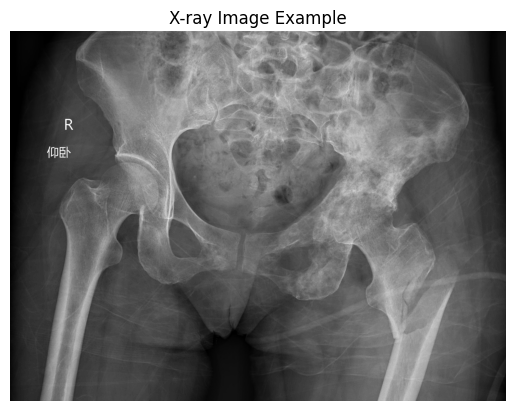

In [2]:
# đọc 1 ảnh
import cv2
import matplotlib.pyplot as plt

# Đường dẫn tới hình ảnh trong thư mục dataset
image_path = '/kaggle/input/btxrd-data/BTXRD/images/IMG000001.jpeg'

# Đọc hình ảnh bằng OpenCV
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Hiển thị hình ảnh bằng Matplotlib
plt.imshow(image, cmap='gray')
plt.title('X-ray Image Example')
plt.axis('off')
plt.show()


# **Dùng EDA** 

In [3]:
# Khởi tạo môi trường và tải dữ liệu
import os
import cv2
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import pandas as pd
import seaborn as sns

In [4]:
# Đọc dữ liệu 5 tệp JSON đầu tiên để kiểm tra thông tin annotation
annotations = []

for json_file in json_files[:5]: 
    json_path = os.path.join(annotation_dir, json_file)
    with open(json_path, 'r') as f:
        data = json.load(f)
        annotations.append(data)

# Hiển thị dữ liệu từ JSON dưới dạng DataFrame
df = pd.json_normalize(annotations)
print(df.head())


NameError: name 'json_files' is not defined

In [ ]:
# Kiểm tra số lượng ảnh có trong dataset
import os
import json
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm  # Thêm tqdm để hiển thị tiến độ
import matplotlib.pyplot as plt

# Thư mục chứa dữ liệu
image_dir = '/kaggle/input/btxrd-data/BTXRD/images'
annotation_dir = '/kaggle/input/btxrd-data/BTXRD/Annotations'

# Kích thước ảnh chuẩn hóa
IMG_SIZE = 224

# Tạo danh sách lưu dữ liệu và nhãn
images = []
labels = []

# Duyệt qua các file JSON và đọc ảnh, nhãn với thanh tiến trình
for json_file in tqdm(os.listdir(annotation_dir), desc="Đang xử lý ảnh", unit="ảnh"):
    json_path = os.path.join(annotation_dir, json_file)
    with open(json_path, 'r') as f:
        data = json.load(f)
        
        # Lấy đường dẫn ảnh tương ứng
        image_filename = data['imagePath']
        image_path = os.path.join(image_dir, image_filename)
        
        # Đọc và tiền xử lý ảnh
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            image = image / 255.0  # Chuẩn hóa ảnh
            images.append(image)
            
            # Lấy nhãn từ file JSON
            if 'shapes' in data and len(data['shapes']) > 0:
                label = data['shapes'][0]['label']
                labels.append(label)

# Chuyển đổi dữ liệu về numpy array
images = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
labels = np.array(labels)

# Kiểm tra số lượng ảnh và nhãn
print(f'\nTổng số ảnh: {len(images)}, Tổng số nhãn: {len(labels)}')


In [ ]:
# Đọc và hiển thị 5 hình ảnh đầu tiên
plt.figure(figsize=(15, 5))

for i, image_file in enumerate(image_files[:5]):  
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    plt.subplot(1, 5, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# ramdom 100 ảnh 
import random

num_images = 100

# Chọn ngẫu nhiên 100 ảnh và nhãn tương ứng
random_indices = random.sample(range(len(images)), min(num_images, len(images)))
random_images = [images[i] for i in random_indices]
random_labels = [labels[i] for i in random_indices]

# Định dạng lưới hiển thị
rows = 10
cols = 10

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

for i, ax in enumerate(axes.flat):
    if i >= len(random_images):
        break
    ax.imshow(random_images[i].squeeze(), cmap='gray')  # Hiển thị ảnh
    # ax.set_title(random_labels[i])  # Hiển thị nhãn ảnh
    ax.axis('off')  # Ẩn trục tọa độ

plt.tight_layout()
plt.show()


In [ ]:
# thống kê phân loại ảnh
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Đếm số lượng mỗi loại ảnh
label_counts = Counter(labels)

# Vẽ biểu đồ
plt.figure(figsize=(5, 3))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette='viridis')

# Thêm nhãn và tiêu đề
plt.xlabel("Loại ảnh")
plt.ylabel("Số lượng")
plt.title("Thống kê số lượng từng loại ảnh trong dataset")
plt.xticks(rotation=90)  # Xoay nhãn trên trục x cho dễ đọc

# Hiển thị biểu đồ
plt.show()


In [ ]:
# thống kê kích thước ảnh

# Lấy danh sách kích thước ảnh (width, height)
image_sizes = [cv2.imread(os.path.join(image_dir, data['imagePath'])).shape[:2] for data in tqdm([json.load(open(os.path.join(annotation_dir, f))) for f in os.listdir(annotation_dir)])]

# Chuyển đổi về numpy array
image_sizes = np.array(image_sizes)

# Tạo DataFrame để vẽ biểu đồ
df_sizes = pd.DataFrame(image_sizes, columns=['Height', 'Width'])

# Vẽ biểu đồ kích thước ảnh
plt.figure(figsize=(10, 5))
sns.histplot(df_sizes, kde=True, bins=30)

# Thêm nhãn và tiêu đề
plt.xlabel("Pixels")
plt.ylabel("Số lượng ảnh")
plt.title("Phân bố kích thước ảnh trong dataset")

# Hiển thị biểu đồ
plt.show()


In [ ]:
# tỉ lệ mắc các loại ung thư xương ở các độ tuổi và giới tính
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc file Excel
excel_path = '/kaggle/input/btxrd-data/BTXRD/dataset.xlsx'
df_info = pd.read_excel(excel_path, sheet_name=0)  # Sheet 1

# Đọc tất cả các file JSON trong thư mục chứa annotation
annotation_dir = '/kaggle/input/btxrd-data/BTXRD/Annotations'
data_list = []

for json_file in os.listdir(annotation_dir):
    json_path = os.path.join(annotation_dir, json_file)
    with open(json_path, "r") as f:
        data = json.load(f)
        image_id = data["imagePath"]
        # Lấy danh sách các nhãn ung thư từ shapes
        labels = [shape["label"] for shape in data["shapes"]]
        for label in set(labels):  # Loại bỏ trùng lặp nhãn trong cùng một ảnh
            data_list.append({"image_id": image_id, "cancer_type": label})

# Tạo DataFrame từ JSON
df_cancer = pd.DataFrame(data_list)

# Gộp dữ liệu từ dataset.xlsx với JSON theo `image_id`
df_merged = df_info.merge(df_cancer, on="image_id", how="inner")

# Biểu đồ 1: Số lượng ca ung thư theo từng nhóm tuổi
df_age_group = df_merged.groupby("cancer_type")["age"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x="cancer_type", y="age", data=df_age_group, palette="pastel")
plt.xticks(rotation=90)
plt.xlabel("Loại ung thư")
plt.ylabel("Tuổi trung bình")
plt.title("Tuổi trung bình theo loại ung thư")
plt.show()

# Biểu đồ 2: Phân bố giới tính theo loại ung thư
df_gender_count = df_merged.groupby(["cancer_type", "gender"]).size().reset_index(name="count")

plt.figure(figsize=(10, 5))
sns.barplot(x="cancer_type", y="count", hue="gender", data=df_gender_count, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Loại ung thư")
plt.ylabel("Số lượng")
plt.title("Phân bố giới tính theo loại ung thư")
plt.legend(title="Giới tính", labels=["Nam", "Nữ"])
plt.show()


In [ ]:
# tỉ lệ center = 1 vs các loại ung thư
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm  # Hiển thị tiến trình

# Đọc file Excel
excel_path = '/kaggle/input/btxrd-data/BTXRD/dataset.xlsx'
df_info = pd.read_excel(excel_path, sheet_name=0)  # Đọc Sheet 1

# Đọc tất cả các file JSON trong thư mục chứa annotation
annotation_dir = '/kaggle/input/btxrd-data/BTXRD/Annotations'
data_list = []

for json_file in tqdm(os.listdir(annotation_dir), desc="Đang xử lý JSON", unit="file"):
    json_path = os.path.join(annotation_dir, json_file)
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)
        image_id = data["imagePath"]
        # Lấy danh sách các nhãn ung thư từ shapes
        labels = [shape["label"] for shape in data["shapes"]]
        for label in set(labels):  # Loại bỏ trùng lặp nhãn trong cùng một ảnh
            data_list.append({"image_id": image_id, "cancer_type": label})

# Tạo DataFrame từ JSON
df_json = pd.DataFrame(data_list)

# Gộp dữ liệu từ dataset.xlsx với JSON theo `image_id`
df_merged = pd.merge(df_info, df_json, on="image_id", how="inner")

# Tính tổng số ca mắc từng loại ung thư
df_total = df_merged.groupby("cancer_type").size().reset_index(name="total_count")

# Tính số ca mắc của `center = 1`
df_center_1 = df_merged[df_merged["center"] == 1].groupby("cancer_type").size().reset_index(name="center_1_count")

# Gộp lại để tính tỷ lệ
df_ratio = pd.merge(df_total, df_center_1, on="cancer_type", how="left").fillna(0)
df_ratio["percentage"] = (df_ratio["center_1_count"] / df_ratio["total_count"]) * 100

# Vẽ biểu đồ cột thể hiện tỷ lệ center = 1 với từng loại ung thư
plt.figure(figsize=(10, 5))
sns.barplot(x="cancer_type", y="percentage", data=df_ratio, palette="pastel")

# Thêm nhãn và tiêu đề
plt.xlabel("Loại ung thư")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ ca mắc bệnh ung thư xương khi Center = 1")
plt.xticks(rotation=90, ha="right")

# Hiển thị biểu đồ
plt.show()


In [ ]:
# Số lượng ca mắc các loại ung thư vs center
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm  # Hiển thị tiến trình

# Đọc file Excel
excel_path = '/kaggle/input/btxrd-data/BTXRD/dataset.xlsx'
df_info = pd.read_excel(excel_path, sheet_name=0)  # Đọc Sheet 1

# Đọc tất cả các file JSON trong thư mục chứa annotation
annotation_dir = '/kaggle/input/btxrd-data/BTXRD/Annotations'
data_list = []

for json_file in tqdm(os.listdir(annotation_dir), desc="Đang xử lý JSON", unit="file"):
    json_path = os.path.join(annotation_dir, json_file)
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)
        image_id = data["imagePath"]
        # Lấy danh sách các nhãn ung thư từ shapes
        labels = [shape["label"] for shape in data["shapes"]]
        for label in set(labels):  # Loại bỏ trùng lặp nhãn trong cùng một ảnh
            data_list.append({"image_id": image_id, "cancer_type": label})

# Tạo DataFrame từ JSON
df_json = pd.DataFrame(data_list)

# Gộp dữ liệu từ dataset.xlsx với JSON theo `image_id`
df_merged = pd.merge(df_info, df_json, on="image_id", how="inner")

# Nhóm dữ liệu theo loại ung thư và center
df_center_count = df_merged.groupby(["cancer_type", "center"]).size().reset_index(name="count")

# Vẽ biểu đồ cột thể hiện tỷ lệ mắc các loại ung thư theo center
plt.figure(figsize=(12, 6))
sns.barplot(x="cancer_type", y="count", hue="center", data=df_center_count, palette="Set2")

# Thêm nhãn và tiêu đề
plt.xlabel("Loại ung thư")
plt.ylabel("Số lượng ca mắc")
plt.title("Số lượng ca mắc các loại ung thư theo từng center")
plt.xticks(rotation=90, ha="right")
plt.legend(title="Center")

# Hiển thị biểu đồ
plt.show()


In [ ]:
# Phân tích đặc điểm hình ảnh
image_shapes = []

for image_file in image_files[:20]:  # Phân tích 20 hình ảnh đầu
    image_path = os.path.join(image_dir, image_file)
    image = Image.open(image_path)
    image_shapes.append(image.size)

# Tạo DataFrame chứa kích thước hình ảnh
shape_df = pd.DataFrame(image_shapes, columns=['Width', 'Height'])
print(shape_df.describe())

# Vẽ biểu đồ phân bố kích thước hình ảnh
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Width', y='Height', data=shape_df)
plt.title('Phân bố kích thước hình ảnh')
plt.xlabel('Chiều rộng (px)')
plt.ylabel('Chiều cao (px)')
plt.show()


# **Tiền xử lý dữ liệu**

In [ ]:
import numpy as np

# Hàm đọc và tiền xử lý hình ảnh
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Chuẩn hóa pixel từ 0-255 về 0-1
    return np.expand_dims(img, axis=-1)

# Hàm tạo mask từ file JSON
def create_mask_from_json(json_path, img_shape=(224, 224)):
    mask = np.zeros(img_shape, dtype=np.uint8)
    with open(json_path, 'r') as f:
        data = json.load(f)
        for shape in data['shapes']:
            points = np.array(shape['points'], dtype=np.int32)
            cv2.fillPoly(mask, [points], 255)
    return mask

# Kiểm tra hình ảnh và mask tương ứng
image_path = os.path.join(image_dir, image_files[0])
json_path = os.path.join(annotation_dir, json_files[0])

img = load_and_preprocess_image(image_path)
mask = create_mask_from_json(json_path)

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(img.squeeze(), cmap='gray')
plt.title('Hình ảnh X-quang')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask Khối U')
plt.show()


# **Tiền xử lý dữ liệu (2)**

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Kiểm tra nếu labels đã là One-Hot Encoding hay chưa
if labels.ndim > 1 and labels.shape[1] > 1:
    print("Labels đã ở dạng One-Hot Encoding, bỏ qua LabelEncoder.")
else:
    print("Labels ở dạng chuỗi hoặc chỉ số, tiến hành mã hóa.")
    # Mã hóa nhãn (Label Encoding) và sau đó One-Hot Encoding
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)  # Chuyển về mảng 1D
    labels = to_categorical(labels)  # Chuyển sang One-Hot Encoding

# Chia tập dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f'Tập huấn luyện: {X_train.shape}, Tập kiểm tra: {X_test.shape}')


In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1. Đọc dữ liệu và tiền xử lý
image_dir = '/kaggle/input/btxrd-data/BTXRD/'
labels = []
images = []

# Đọc tất cả các ảnh và nhãn từ thư mục
for label_folder in os.listdir(image_dir):
    folder_path = os.path.join(image_dir, label_folder)
    if not os.path.isdir(folder_path):
        continue
    
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (224, 224))  # Resize ảnh về cùng kích thước
        images.append(image)
        labels.append(label_folder)  # Lấy tên thư mục làm nhãn

# Chuyển đổi dữ liệu về numpy array
images = np.array(images) / 255.0  # Chuẩn hóa pixel [0, 1]
labels = np.array(labels)

# Mã hóa nhãn và One-Hot Encoding
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)  # Mã hóa nhãn thành số
labels = to_categorical(labels)  # One-hot encoding

# Chia tập dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f'Tập huấn luyện: {X_train.shape}, Tập kiểm tra: {X_test.shape}')

# 2. Xây dựng mô hình CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 lớp đầu ra: "Normal" và "Tumor"
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 3. Huấn luyện mô hình
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    callbacks=callbacks
)

# 4. Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Độ chính xác trên tập kiểm tra: {test_accuracy * 100:.2f}%')

# 5. Dự đoán với ảnh mới
def predict_image(image_path, model, label_encoder):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
    confidence_score = np.max(prediction) * 100

    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f'Dự đoán: {predicted_label[0]} ({confidence_score:.2f}%)')
    plt.axis('off')
    plt.show()

# Ví dụ dự đoán một ảnh mới
predict_image('/kaggle/input/btxrd-data/BTXRD/images/IMG000001.jpeg', model, label_encoder)


# **Xây dựng mô hình**

In [ ]:
from tensorflow.keras import layers, models

def build_unet_model(input_shape=(224, 224, 1)):
    inputs = layers.Input(input_shape)

    # Encoder
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    # Attention cơ bản (ví dụ minh họa)
    attention = layers.Conv2D(32, (1, 1), activation='sigmoid')(p1)
    p1 = layers.multiply([p1, attention])

    # Decoder
    u1 = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(p1)
    u1 = layers.concatenate([u1, c1])
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(u1)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_unet_model()
model.summary()


# **Đánh giá mô hình**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Giả sử y_true và y_pred là nhãn thực tế và dự đoán
y_true = [0, 1, 0, 1, 1]  # ví dụ
y_pred = [0, 1, 0, 0, 1]  # ví dụ

print(classification_report(y_true, y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()
